In [39]:
# Import thư viện
import os
import joblib                as jlb
import matplotlib.pyplot     as plt
import numpy                 as np
import pandas                as pd
import seaborn               as sbn

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes     import GaussianNB, MultinomialNB
from sklearn.metrics          import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

## TẬP DỮ LIỆU IRIS - GaussianNB

In [40]:
# Chuẩn bị dữ liệu
data = pd.read_excel(os.path.join("../../Data/Iris.xls"))

x = data.drop("iris", axis=1)
y = data["iris"]

In [41]:
# Chia tập dữ liệu train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [42]:
# Huấn luyện mô hình GaussianNB
Gmodel = GaussianNB()
Gmodel.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [43]:
# Lưu mô hình
jlb.dump(Gmodel, "../Output/GaussianNB_Iris.pkl")

['../Output/GaussianNB_Iris.pkl']

In [44]:
# Dự đoán
y_pred = Gmodel.predict(x_test)
y_proba = Gmodel.predict_proba(x_test)

In [45]:
# Đánh giá mô hình
print("\n=== ĐÁNH GIÁ MÔ HÌNH GAUSSIAN NB (IRIS) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.4f}%")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro')*100:.4f}%")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro')*100:.4f}%")
print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro')*100:.4f}%")


=== ĐÁNH GIÁ MÔ HÌNH GAUSSIAN NB (IRIS) ===
Accuracy: 96.6667%
Precision (macro): 95.2381%
Recall (macro): 97.4359%
F1-score (macro): 96.1026%


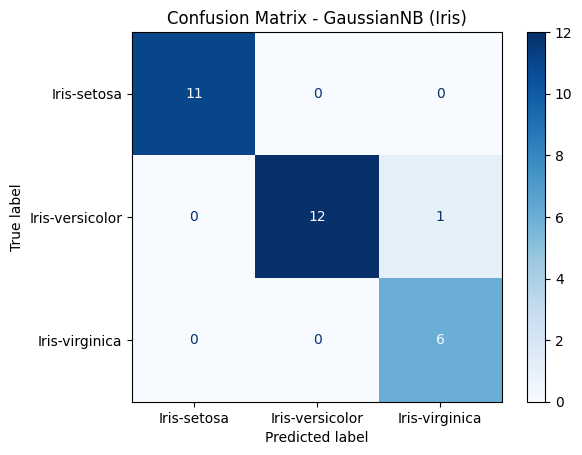

In [46]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - GaussianNB (Iris)")
plt.show()

In [47]:

GGmodel = jlb.load("../Output/GaussianNB_Iris.pkl")

tiep = 'C'
while tiep.upper() == 'C':
    try:
        idx = int(eval(input(f'Nhập chỉ số dòng từ 0 đến {x_test.shape[0]-1}: ')))
        idx = idx % x_test.shape[0]
        x_new = x_test.iloc[[idx]]
        y_pred_new = GGmodel.predict(x_new)
        print('Mẫu:\n', x_new.to_string(index=False), '\n→ Dự đoán là:', y_pred_new[0])
    except Exception as e:
        print("Lỗi:", e)
    tiep = input("Tiếp tục (C/K)? ")

Mẫu:
  sepallength  sepalwidth  petallength  petalwidth
         7.2         3.2          6.0         1.8 
→ Dự đoán là: Iris-virginica


## TẬP DỮ LIỆU SOCIAL_NETWORK_ADS - MultinomialNB

In [48]:
# Chuẩn bị dữ liệu
data = pd.read_csv(os.path.join("../../Data/Social_Network_Ads.csv"))

x = data.drop(["User ID", "EstimatedSalary_K", "Purchased"], axis=1)
x["Male"] = data["Gender"].map({"Male": 1, "Female": 0})
x = x.drop(columns=["Gender"])

y = data["Purchased"]

In [49]:
# Chia tập dữ liệu train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [50]:
# Huấn luyện mô hình MultinomialNB
Mmodel = MultinomialNB()
Mmodel.fit(x_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [51]:
# Lưu mô hình
jlb.dump(Mmodel, "../Output/MultinomialNB_Social.pkl")

['../Output/MultinomialNB_Social.pkl']

In [52]:
# Dự đoán
y_pred = Mmodel.predict(x_test)
y_proba = Mmodel.predict_proba(x_test)[:, 1]

In [53]:
# Đánh giá mô hình
print("\n=== ĐÁNH GIÁ MÔ HÌNH MULTINOMIAL NB (Social_Network_Ads) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")


=== ĐÁNH GIÁ MÔ HÌNH MULTINOMIAL NB (Social_Network_Ads) ===
Accuracy: 0.5500
Precision: 0.4167
Recall: 0.3125
F1-score: 0.3571
AUC: 0.4701


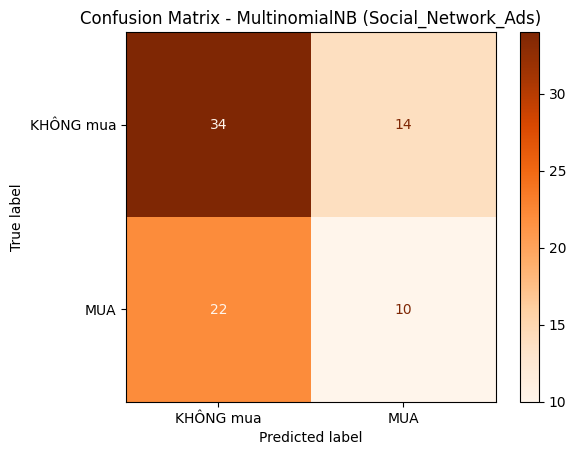

In [54]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["KHÔNG mua", "MUA"])
disp.plot(cmap="Oranges", values_format="d")
plt.title("Confusion Matrix - MultinomialNB (Social_Network_Ads)")
plt.show()

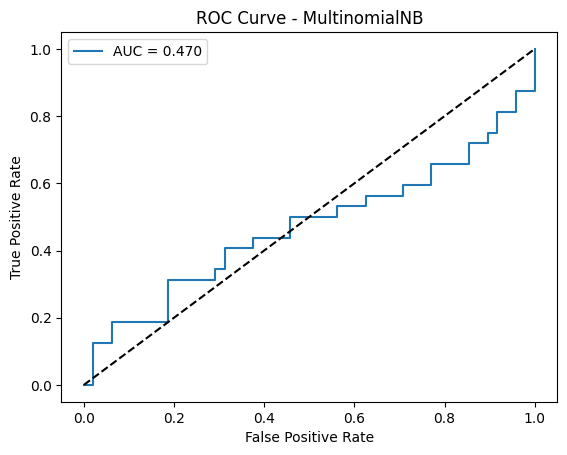

In [55]:
# Biểu đồ ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MultinomialNB")
plt.legend()
plt.show()

In [56]:
# Khai thác mô hình (giữ nguyên logic)
MMmodel = jlb.load("../Output/MultinomialNB_Social.pkl")
labels = np.array(['KHÔNG mua', 'MUA'])
tiep = 'C'
while tiep.upper() == 'C':
    try:
        idx = int(eval(input(f'Nhập chỉ số dòng từ 0 đến {x_test.shape[0]-1}: ')))
        idx = idx % x_test.shape[0]
        x_new = x_test.iloc[[idx]]
        y_pred_new = MMmodel.predict(x_new)
        print('Mẫu:\n', x_new.to_string(index=False), '\n→ Dự đoán là:', labels[y_pred_new][0])
    except Exception as e:
        print("Lỗi:", e)
    tiep = input("Tiếp tục (C/K)? ")

Mẫu:
  Age  EstimatedSalary  Male
  60            42000     1 
→ Dự đoán là: KHÔNG mua
